In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/diabetes.csv'
data = pd.read_csv(file_path)


Mounted at /content/drive


In [ ]:
data.shape

(768, 9)

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [ ]:
corr=data.corr()
print(corr)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<Axes: >

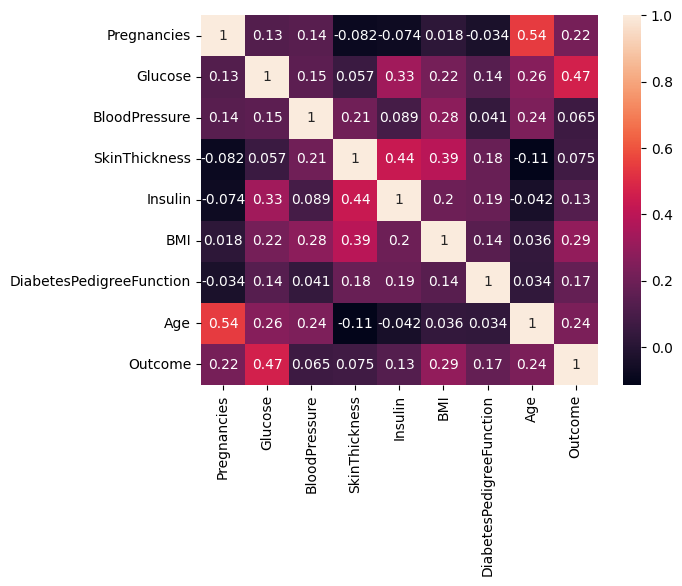

In [ ]:
%matplotlib inline
sns.heatmap(corr,annot=True)

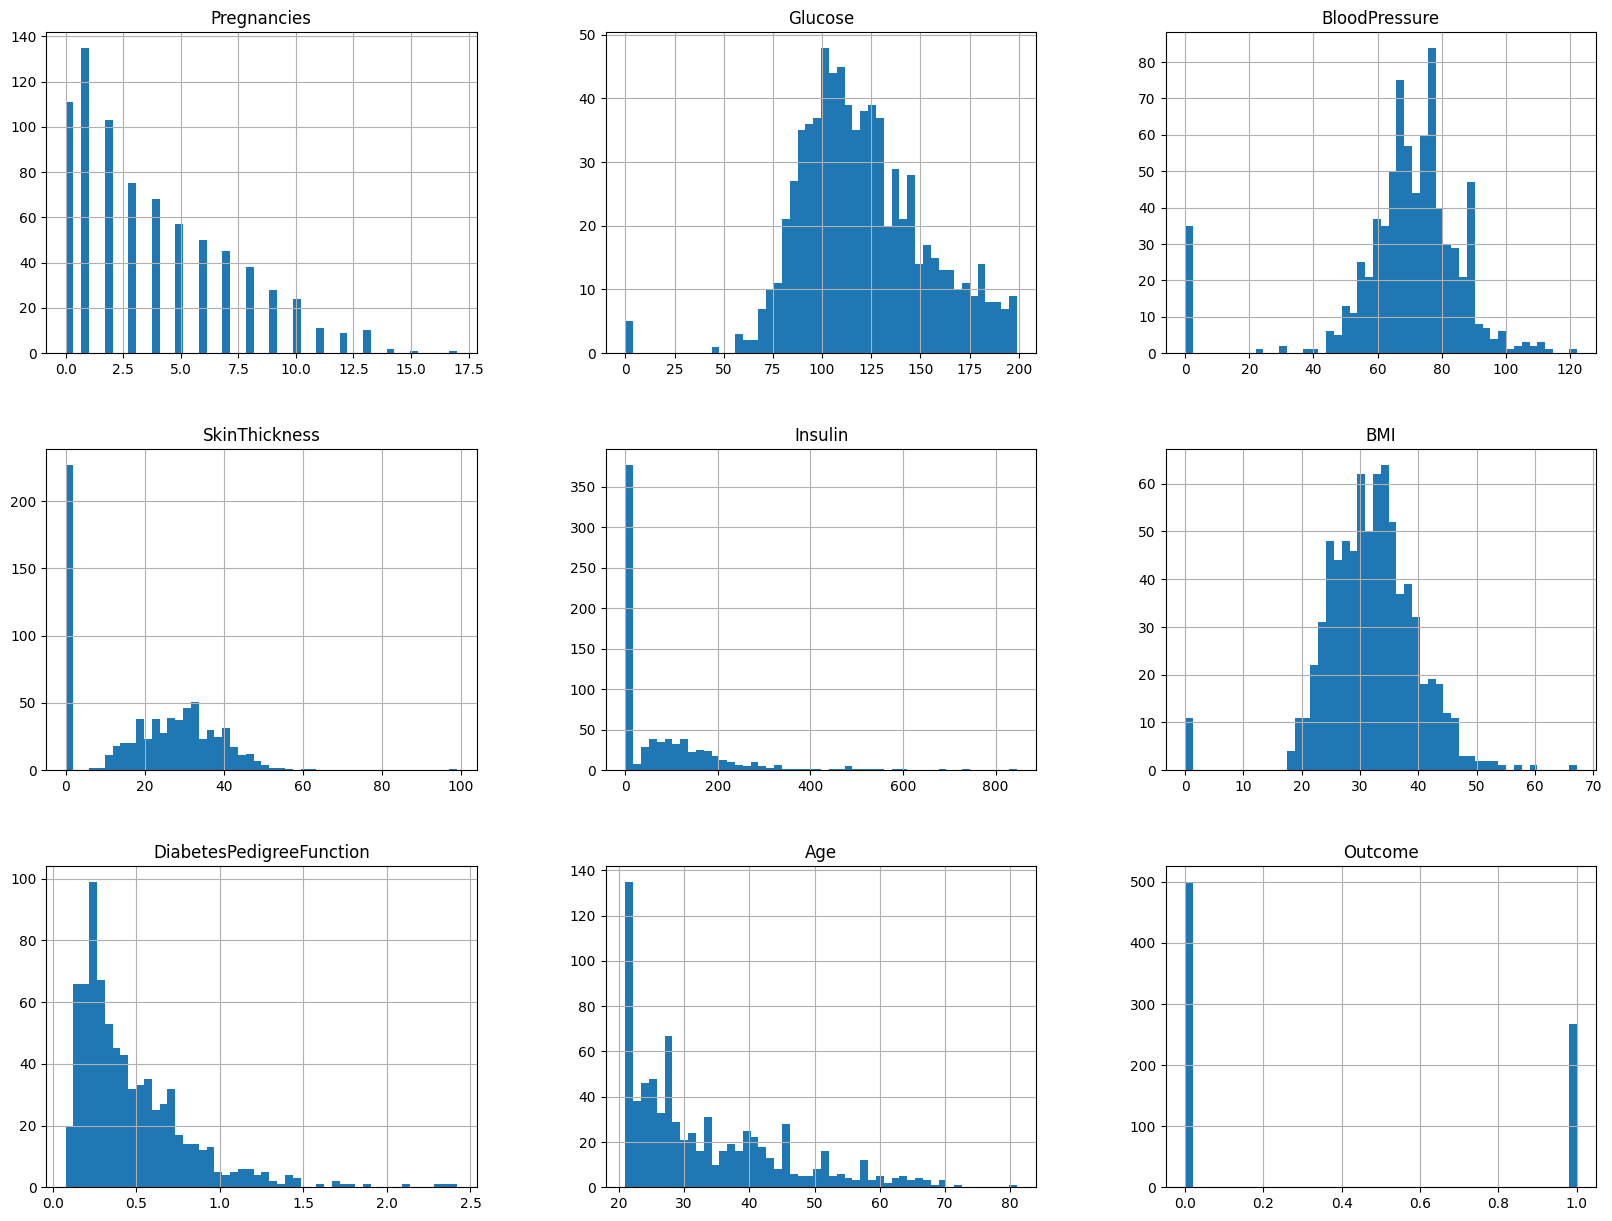

In [ ]:
import matplotlib.pyplot as plt
data.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
bmi_med=data['BMI'].median()
data['BMI']=data['BMI'].replace(to_replace=0,value=bmi_med)

bp_med=data['BloodPressure'].median()
data['BloodPressure']=data['BloodPressure'].replace(to_replace=0,value=bp_med)


glu_med=data['Glucose'].median()
data['Glucose']=data['Glucose'].replace(to_replace=0,value=glu_med)

skin_med=data['SkinThickness'].median()
data['SkinThickness']=data['SkinThickness'].replace(to_replace=0,value=skin_med)

in_med=data['Insulin'].median()
data['Insulin']=data['Insulin'].replace(to_replace=0,value=in_med)


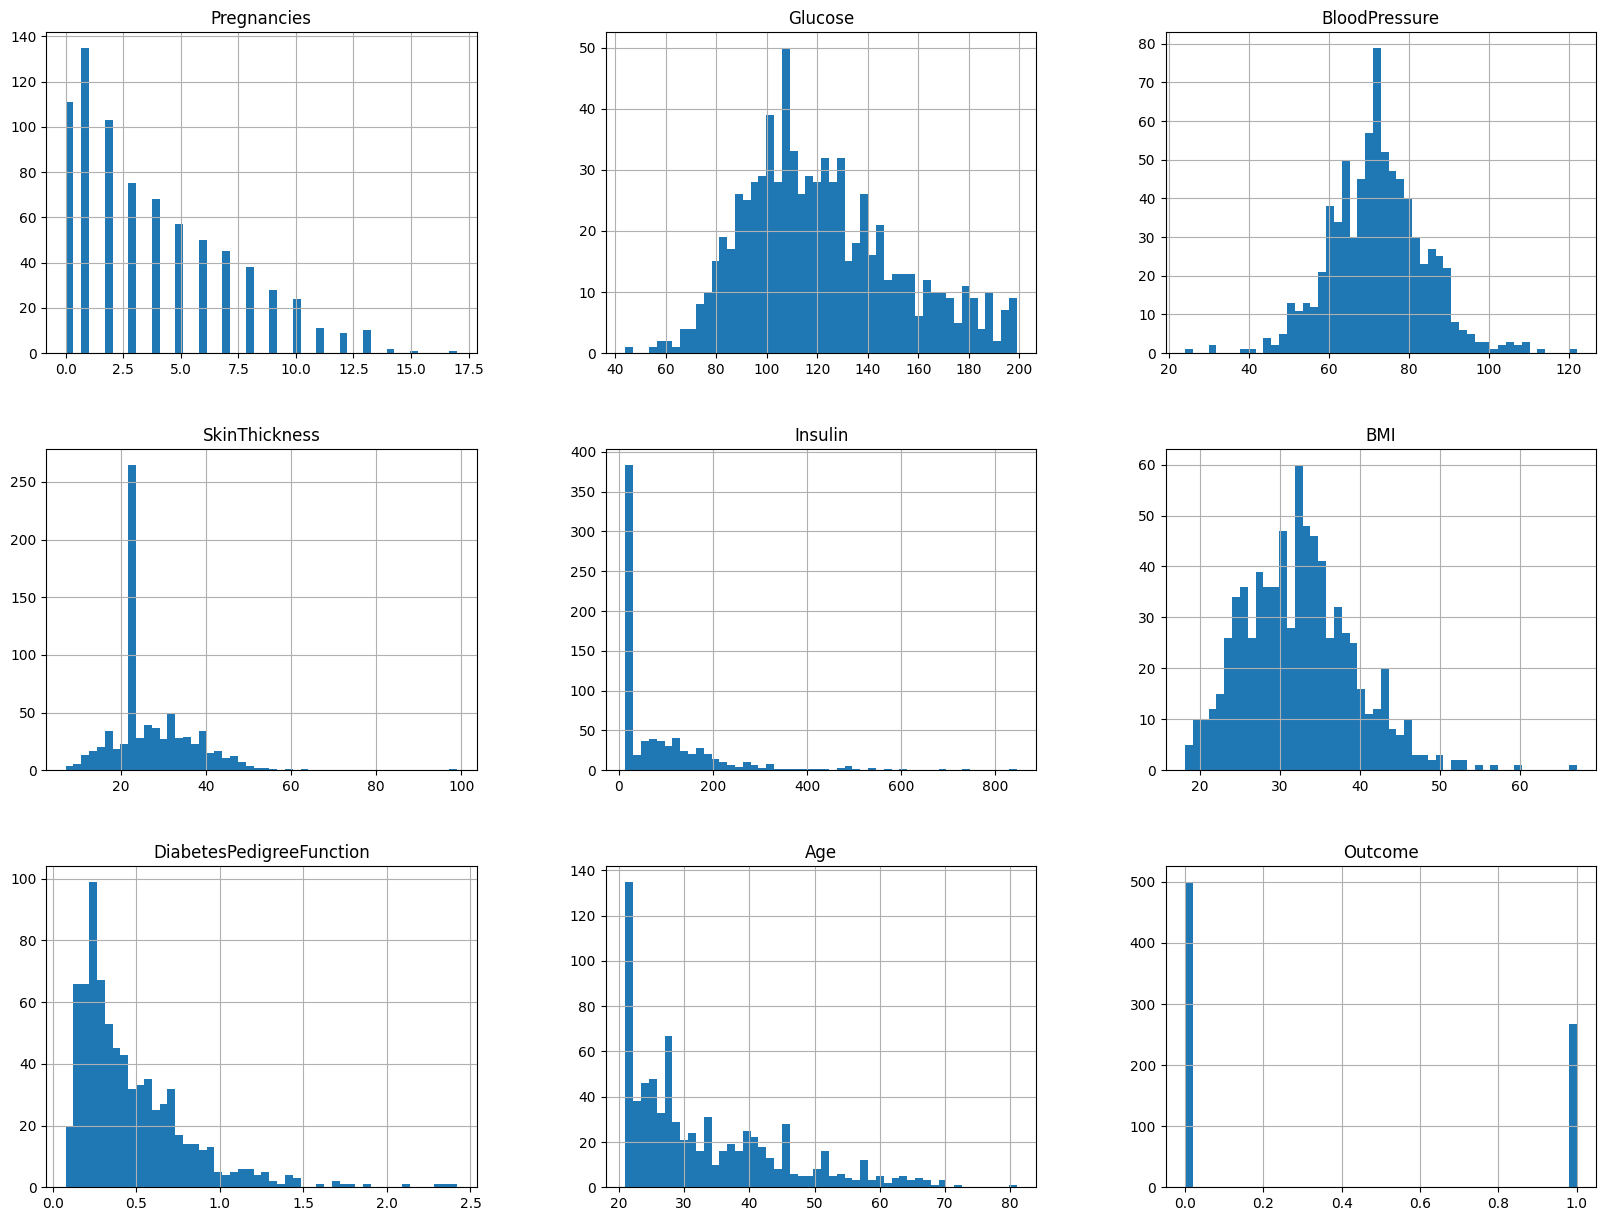

In [ ]:
data.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


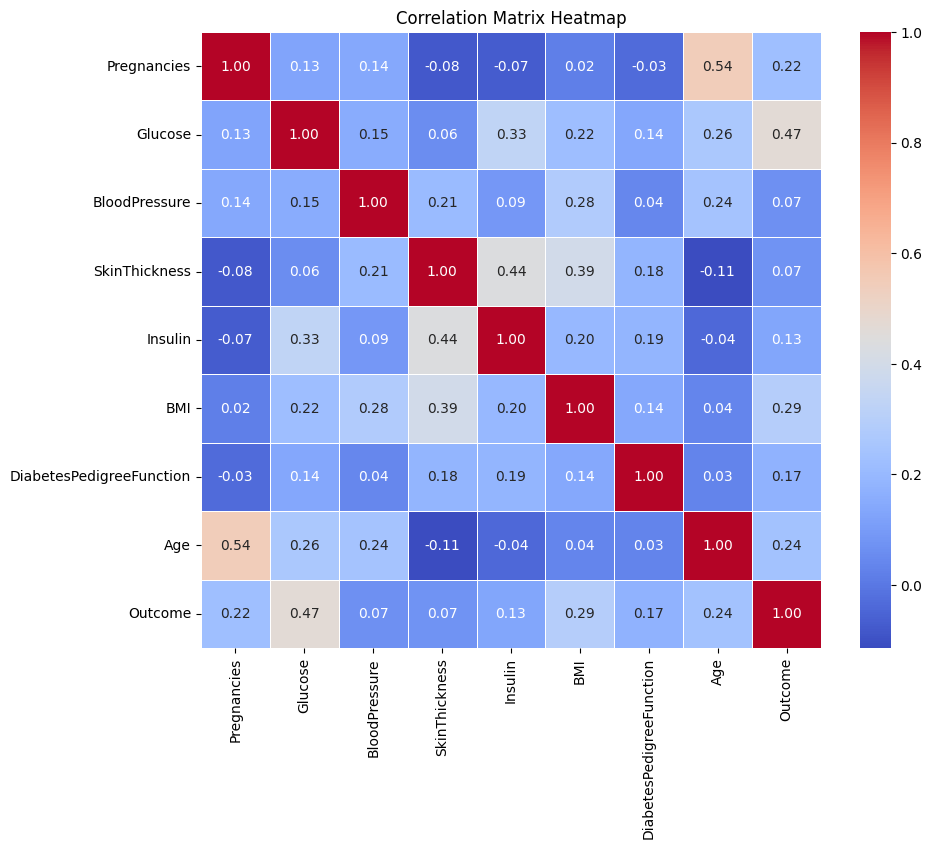

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

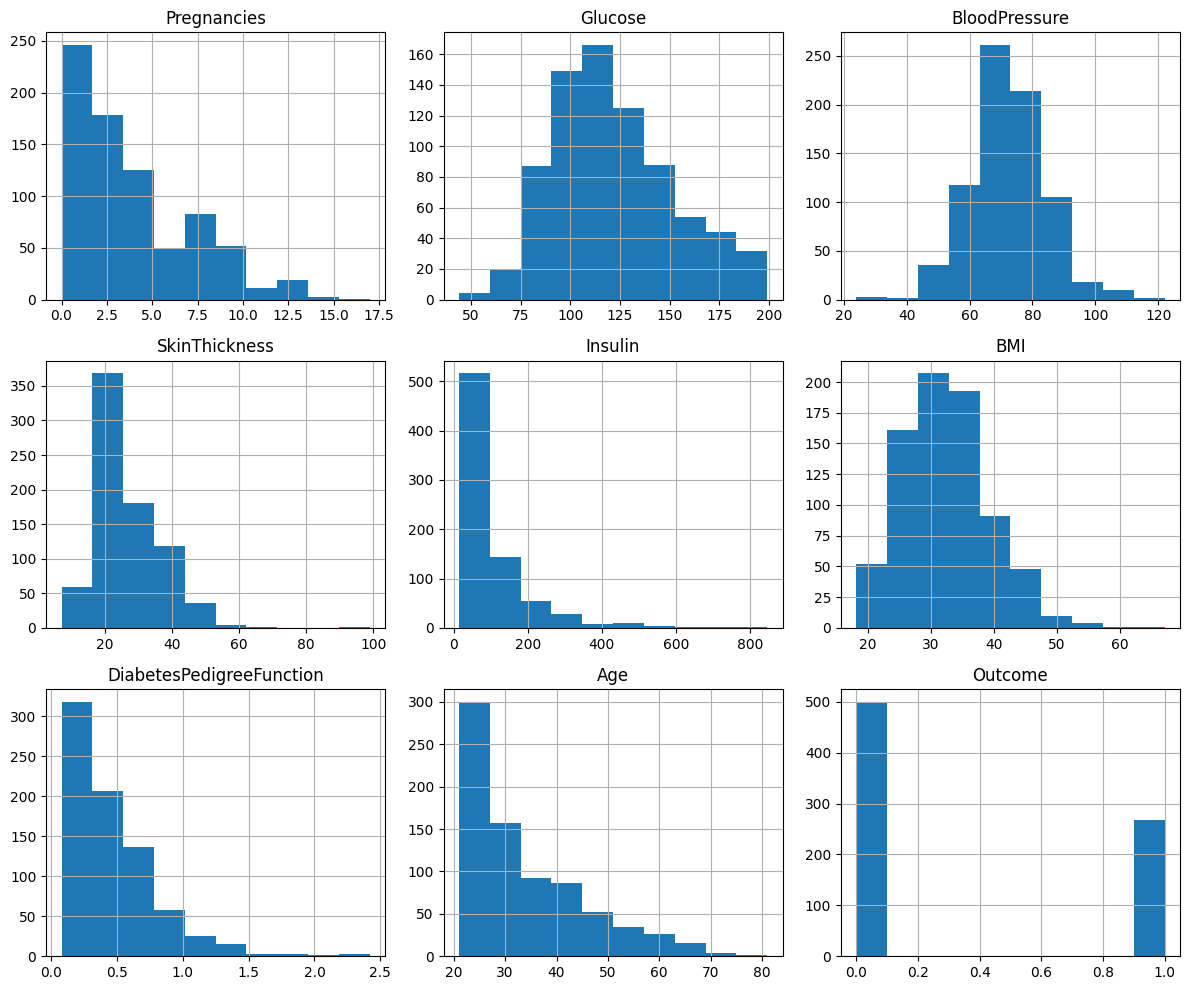

In [ ]:
data.hist(figsize=(12, 10))  # Adjust the figure size as needed
plt.tight_layout()  # Adjust layout to prevent overlapping of plots
plt.show()

<ipython-input-18-f476f4b37ced>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Outcome', y=feature, palette='colorblind', ci=None)
<ipython-input-18-f476f4b37ced>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Outcome', y=feature, palette='colorblind', ci=None)


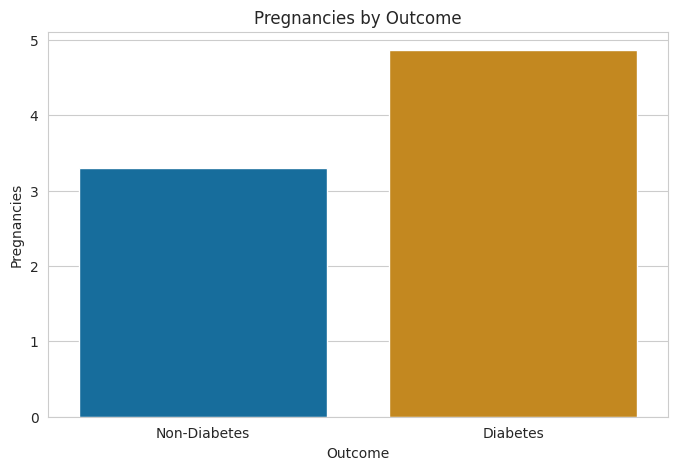

<ipython-input-18-f476f4b37ced>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Outcome', y=feature, palette='colorblind', ci=None)
<ipython-input-18-f476f4b37ced>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Outcome', y=feature, palette='colorblind', ci=None)


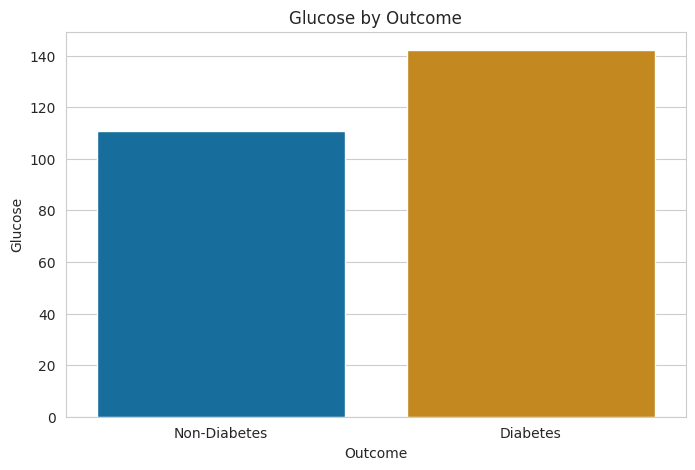

<ipython-input-18-f476f4b37ced>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Outcome', y=feature, palette='colorblind', ci=None)
<ipython-input-18-f476f4b37ced>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Outcome', y=feature, palette='colorblind', ci=None)


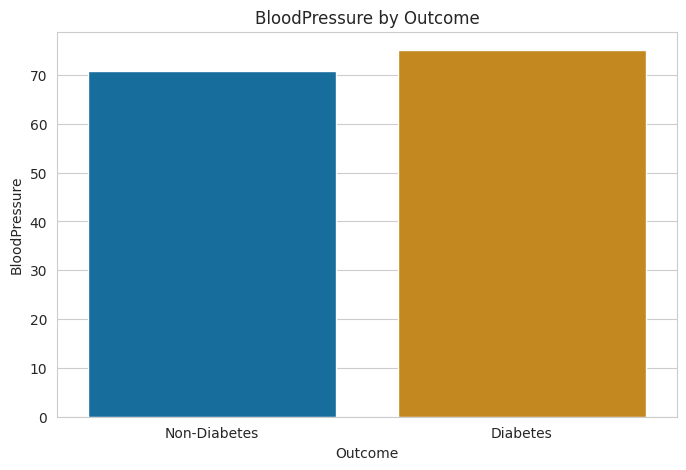

<ipython-input-18-f476f4b37ced>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Outcome', y=feature, palette='colorblind', ci=None)
<ipython-input-18-f476f4b37ced>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Outcome', y=feature, palette='colorblind', ci=None)


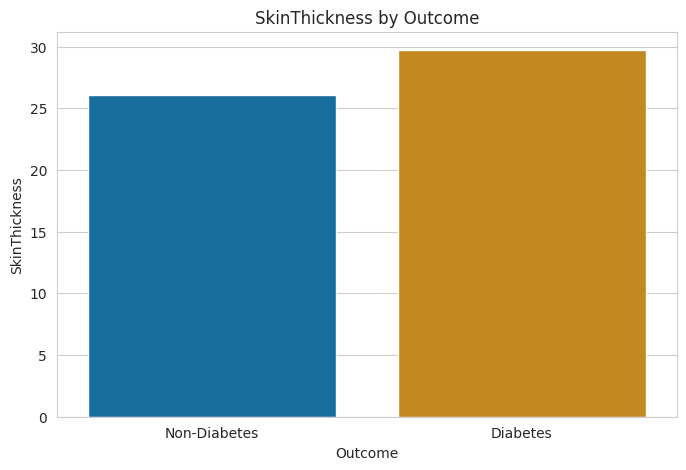

<ipython-input-18-f476f4b37ced>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Outcome', y=feature, palette='colorblind', ci=None)
<ipython-input-18-f476f4b37ced>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Outcome', y=feature, palette='colorblind', ci=None)


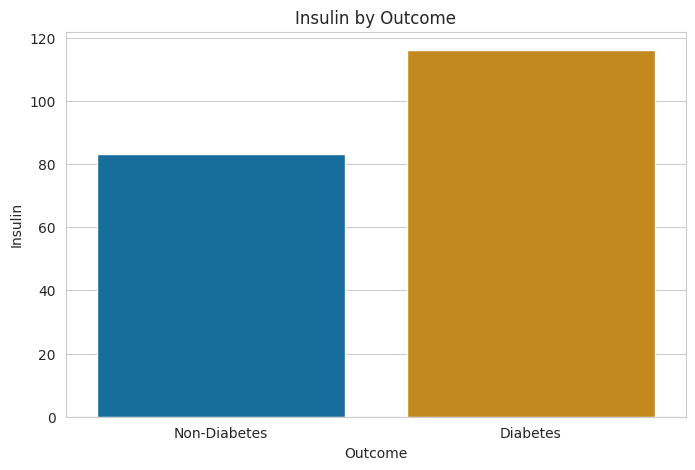

<ipython-input-18-f476f4b37ced>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Outcome', y=feature, palette='colorblind', ci=None)
<ipython-input-18-f476f4b37ced>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Outcome', y=feature, palette='colorblind', ci=None)


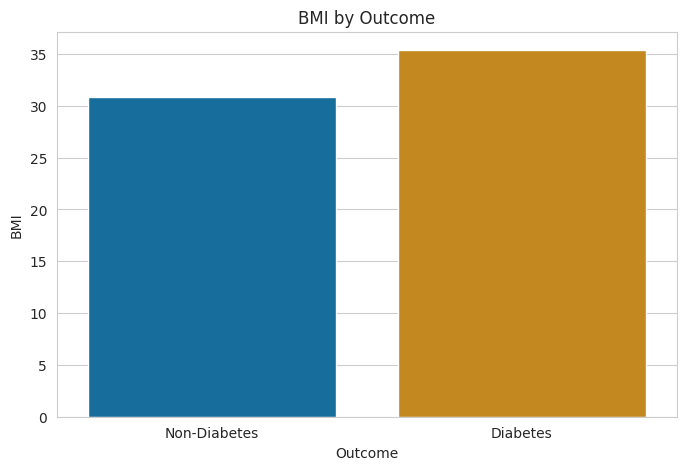

<ipython-input-18-f476f4b37ced>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Outcome', y=feature, palette='colorblind', ci=None)
<ipython-input-18-f476f4b37ced>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Outcome', y=feature, palette='colorblind', ci=None)


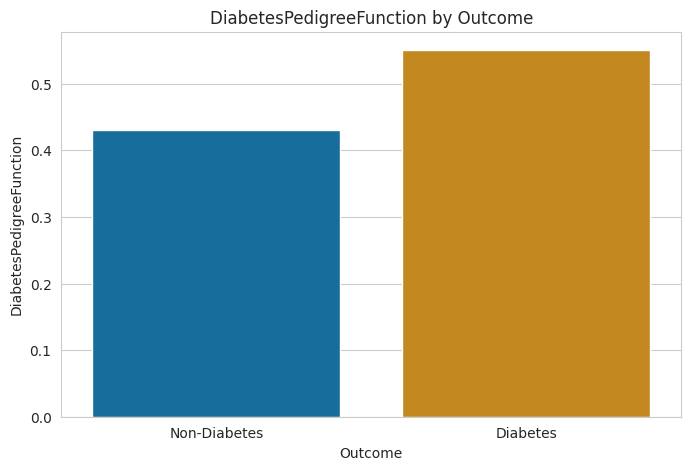

<ipython-input-18-f476f4b37ced>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Outcome', y=feature, palette='colorblind', ci=None)
<ipython-input-18-f476f4b37ced>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Outcome', y=feature, palette='colorblind', ci=None)


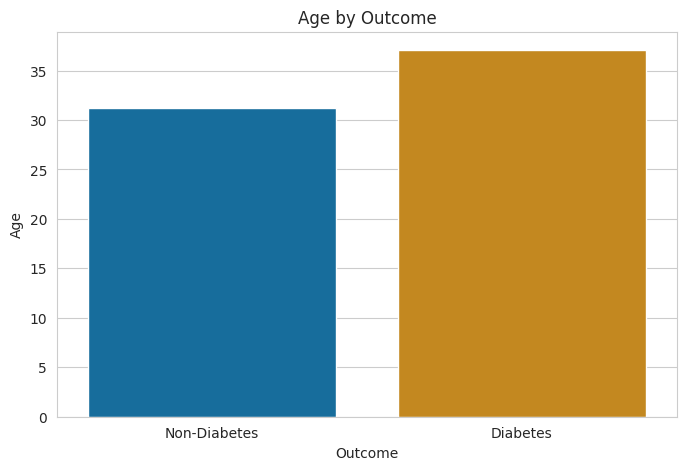

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for seaborn
sns.set_style("whitegrid")

# Define the numerical features
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Plot bar graphs for each numerical attribute, comparing with Outcome
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=data, x='Outcome', y=feature, palette='colorblind', ci=None)
    plt.title(f'{feature} by Outcome')
    plt.xlabel('Outcome')
    plt.ylabel(feature)
    plt.xticks([0, 1], ['Non-Diabetes', 'Diabetes'])
    plt.show()


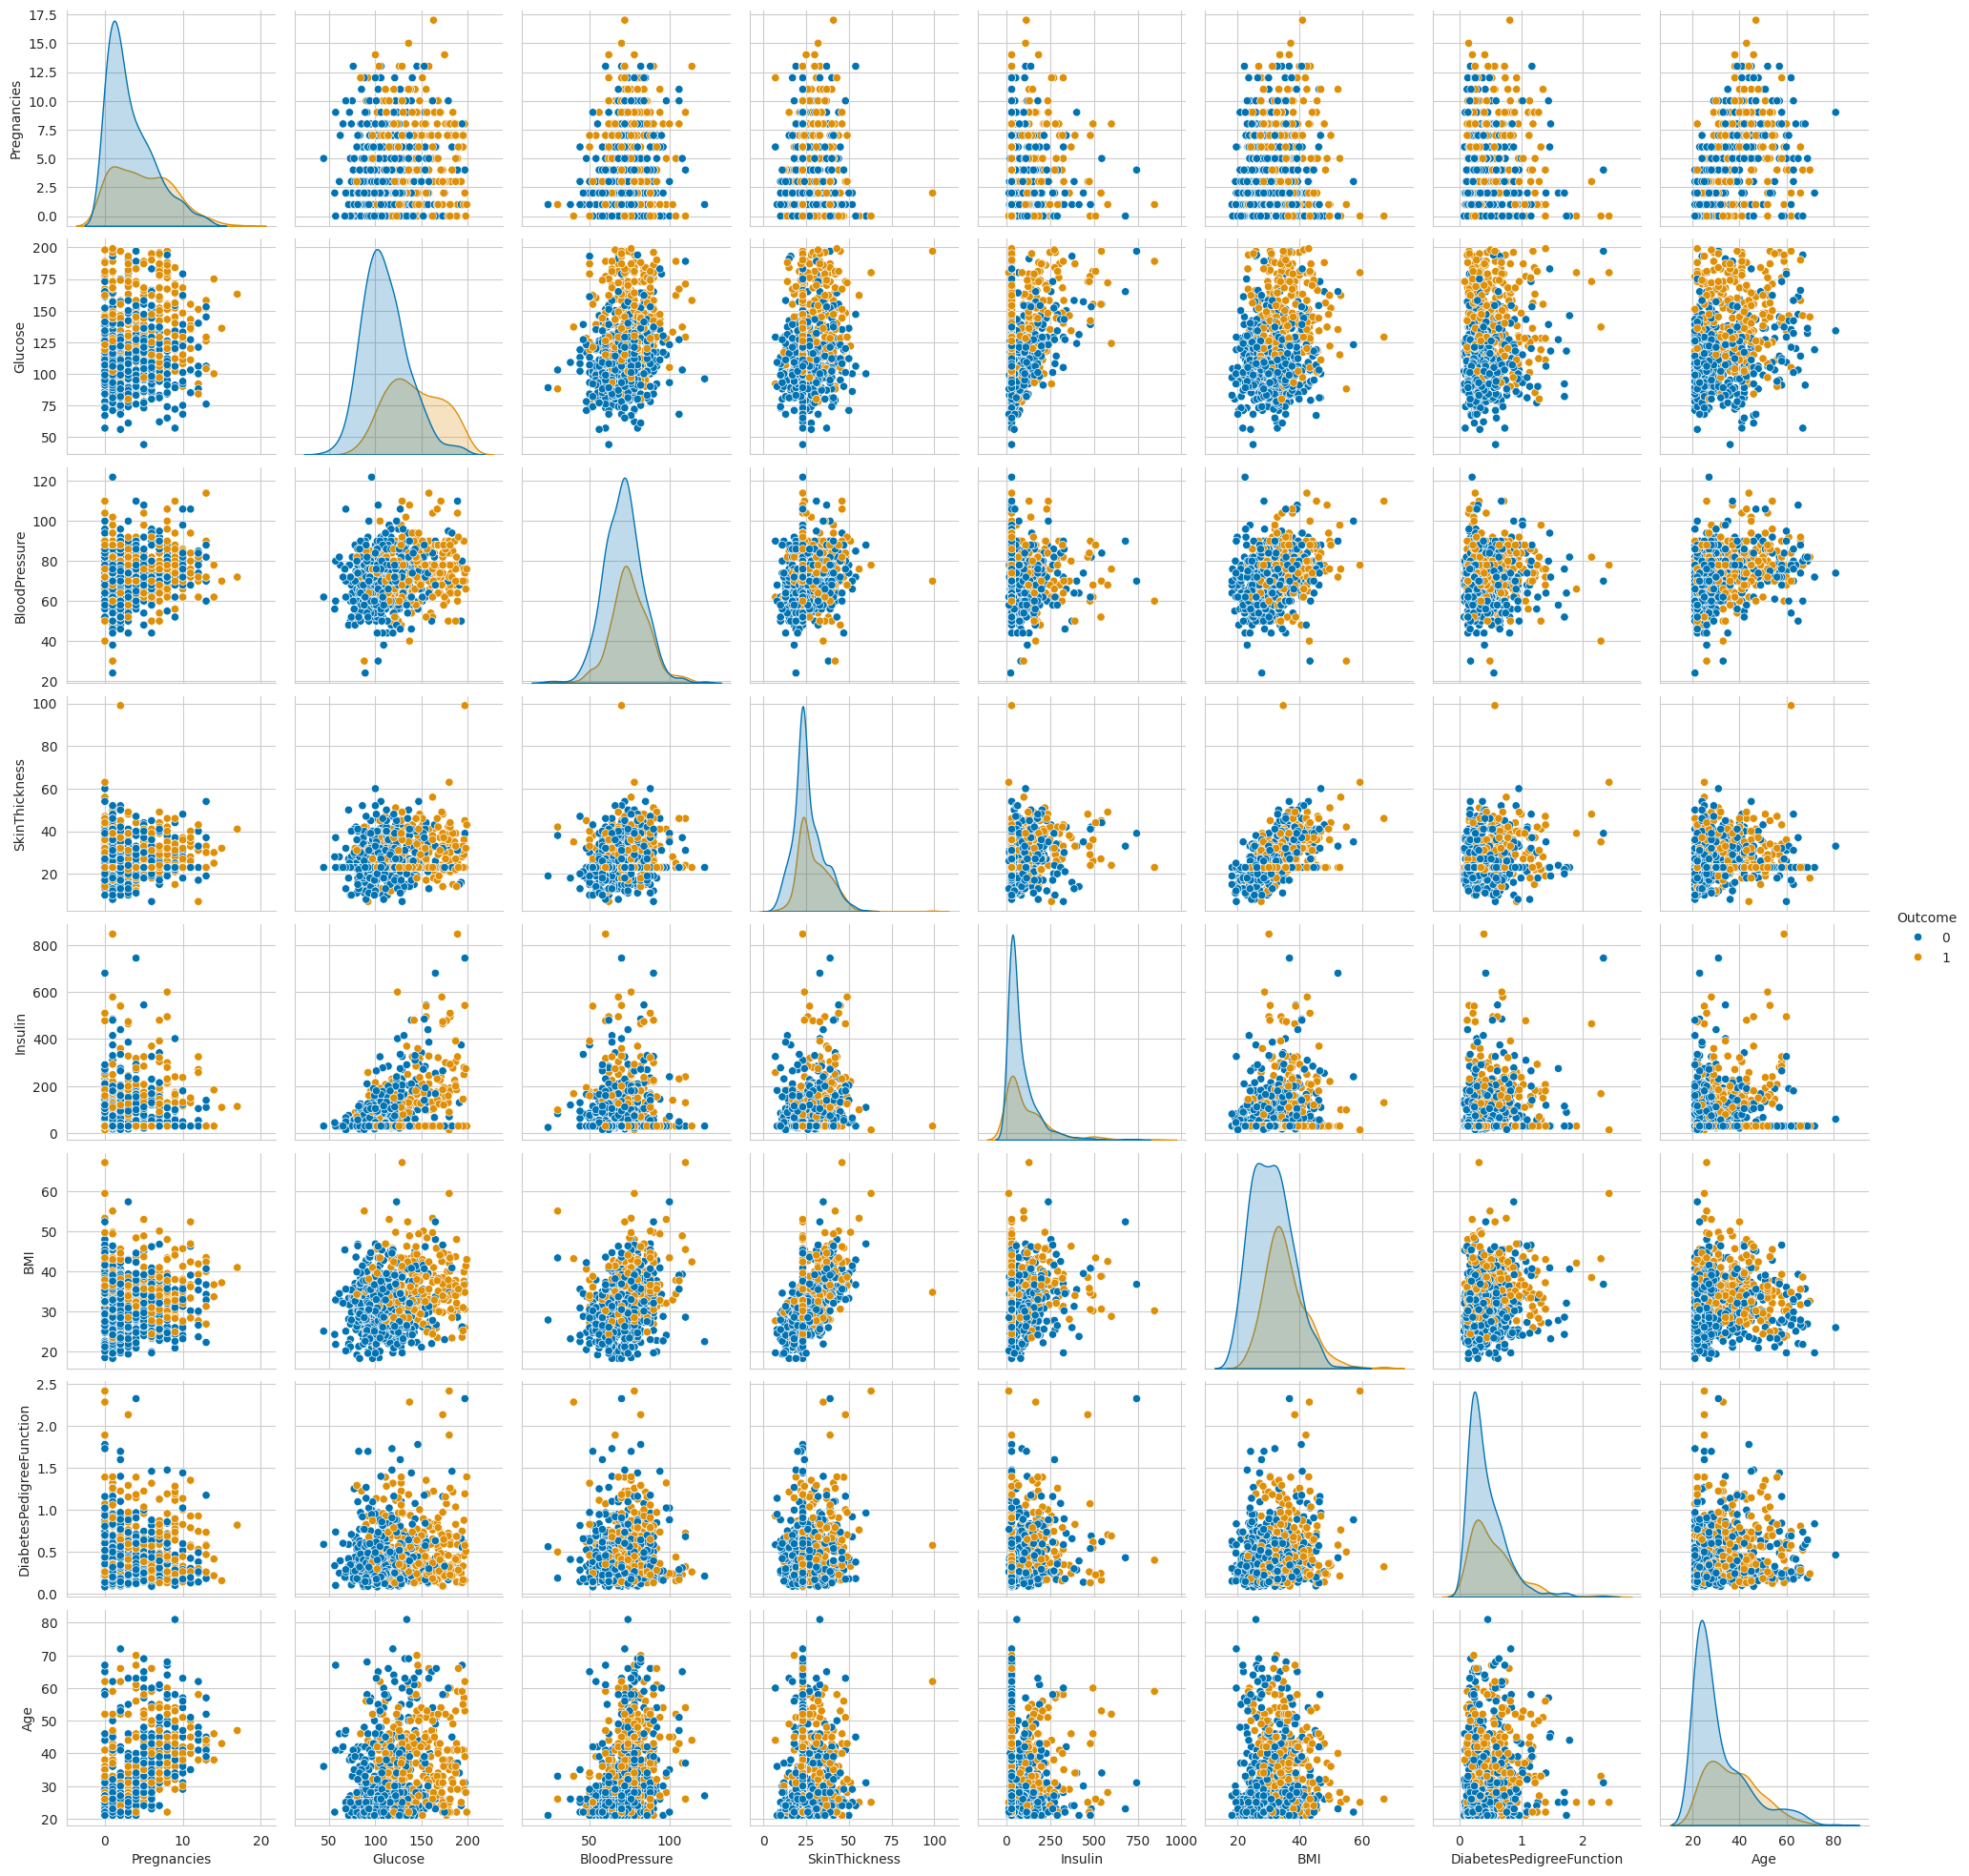

In [ ]:
sns.pairplot(data, hue='Outcome', palette='colorblind')
plt.show()


<ipython-input-20-e1358ae5979e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='Outcome', y='Glucose', palette='colorblind')


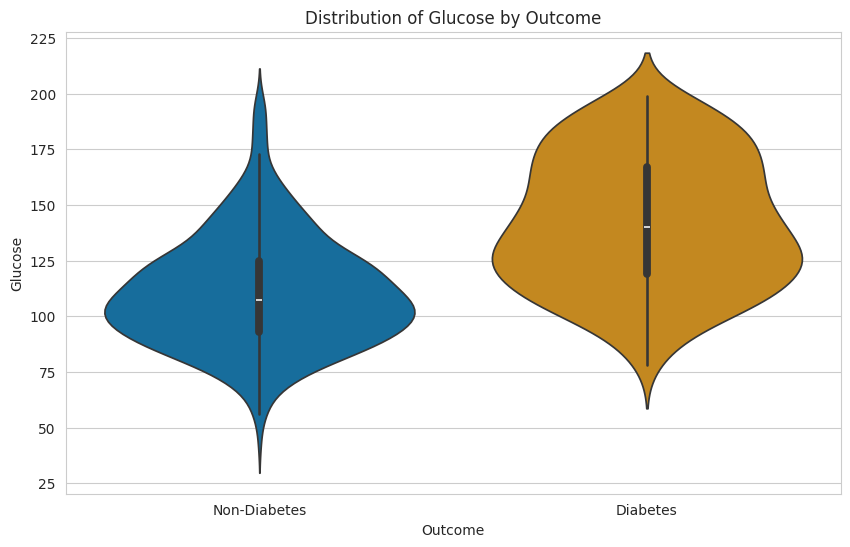

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Outcome', y='Glucose', palette='colorblind')
plt.title('Distribution of Glucose by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.xticks([0, 1], ['Non-Diabetes', 'Diabetes'])
plt.show()

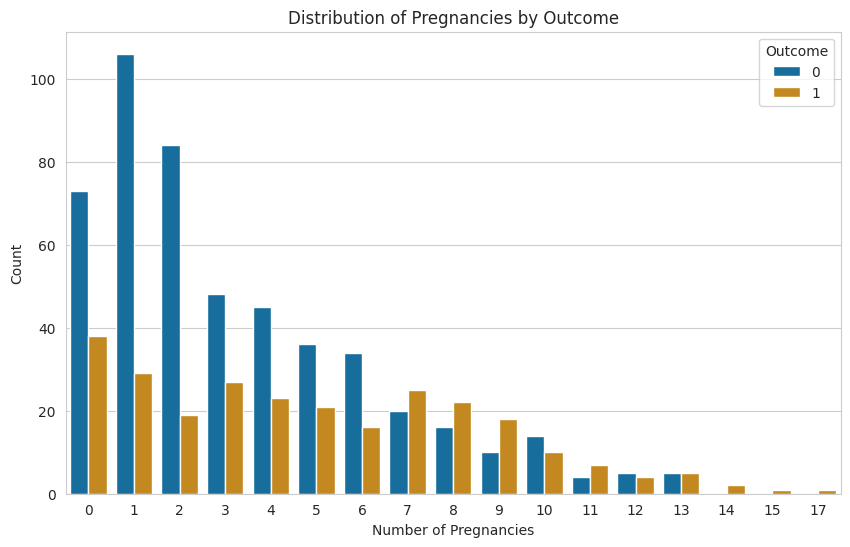

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Pregnancies', hue='Outcome', palette='colorblind')
plt.title('Distribution of Pregnancies by Outcome')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.legend(title='Outcome', loc='upper right')
plt.show()


In [ ]:
sc_X = StandardScaler()
X = pd.DataFrame(
    sc_X.fit_transform(data.drop(["Outcome"], axis=1)),
    columns=[
        'Pregnancies',
        'Glucose',
        'BloodPressure',
        'SkinThickness',
        'Insulin',
        'BMI',
        'DiabetesPedigreeFunction',
        'Age'
    ]
)

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.831114,-0.608201,0.167240,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,0.180566,-0.608201,-0.851551,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.469981,-0.608201,-1.331838,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.469981,-0.006185,-0.633239,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.831114,0.695378,1.549885,5.484909,-0.020496


In [ ]:

# Split the dataset into features and target variable
X = data.drop(columns='Outcome')
y = data['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:

# Naive Bayes with 3 features
nb_model_3f = GaussianNB()
nb_model_3f.fit(X_train[['Glucose', 'BMI', 'Age']], y_train)
y_pred_nb_3f = nb_model_3f.predict(X_test[['Glucose', 'BMI', 'Age']])
y_pred_prob_nb_3f = nb_model_3f.predict_proba(X_test[['Glucose', 'BMI', 'Age']])[:, 1]

# Naive Bayes with 5 features
nb_model_5f = GaussianNB()
nb_model_5f.fit(X_train[['Glucose', 'BMI', 'Age', 'Insulin', 'SkinThickness']], y_train)
y_pred_nb_5f = nb_model_5f.predict(X_test[['Glucose', 'BMI', 'Age', 'Insulin', 'SkinThickness']])
y_pred_prob_nb_5f = nb_model_5f.predict_proba(X_test[['Glucose', 'BMI', 'Age', 'Insulin', 'SkinThickness']])[:, 1]


In [ ]:


# Decision Tree with 3 features
dt_model_3f = DecisionTreeClassifier(random_state=42)
dt_model_3f.fit(X_train[['Glucose', 'BMI', 'Age']], y_train)
y_pred_dt_3f = dt_model_3f.predict(X_test[['Glucose', 'BMI', 'Age']])
y_pred_prob_dt_3f = dt_model_3f.predict_proba(X_test[['Glucose', 'BMI', 'Age']])[:, 1]

# Decision Tree with 5 features
dt_model_5f = DecisionTreeClassifier(random_state=42)
dt_model_5f.fit(X_train[['Glucose', 'BMI', 'Age', 'Insulin', 'SkinThickness']], y_train)
y_pred_dt_5f = dt_model_5f.predict(X_test[['Glucose', 'BMI', 'Age', 'Insulin', 'SkinThickness']])
y_pred_prob_dt_5f = dt_model_5f.predict_proba(X_test[['Glucose', 'BMI', 'Age', 'Insulin', 'SkinThickness']])[:, 1]


In [ ]:
# Evaluation function
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    sensitivity = recall
    specificity = accuracy_score(y_true[y_true==0], y_pred[y_true==0])
    return accuracy, precision, recall, f1, sensitivity, specificity



In [ ]:
# Evaluation results as a table

# Create a DataFrame to hold the evaluation results
evaluation_results = pd.DataFrame({
    'Model': ['Naive Bayes 3 features', 'Naive Bayes 5 features', 'Decision Tree 3 features', 'Decision Tree 5 features'],
    'Accuracy': [nb_accuracy_3f, nb_accuracy_5f, dt_accuracy_3f, dt_accuracy_5f],
    'Precision': [nb_precision_3f, nb_precision_5f, dt_precision_3f, dt_precision_5f],
    'Recall': [nb_recall_3f, nb_recall_5f, dt_recall_3f, dt_recall_5f],
    'F1 Score': [nb_f1_3f, nb_f1_5f, dt_f1_3f, dt_f1_5f],
    'Sensitivity': [nb_sensitivity_3f, nb_sensitivity_5f, dt_sensitivity_3f, dt_sensitivity_5f],
    'Specificity': [nb_specificity_3f, nb_specificity_5f, dt_specificity_3f, dt_specificity_5f]
})

# Print the DataFrame
print(evaluation_results)


                      Model  Accuracy  Precision  Recall  F1 Score  \
0    Naive Bayes 3 features  0.727273   0.610390  0.5875  0.598726   
1    Naive Bayes 5 features  0.740260   0.631579  0.6000  0.615385   
2  Decision Tree 3 features  0.666667   0.517241  0.5625  0.538922   
3  Decision Tree 5 features  0.679654   0.532609  0.6125  0.569767   

   Sensitivity  Specificity  
0       0.5875     0.801325  
1       0.6000     0.814570  
2       0.5625     0.721854  
3       0.6125     0.715232  


In [ ]:
# Confusion Matrices
cm_nb_3f = confusion_matrix(y_test, y_pred_nb_3f)
cm_nb_5f = confusion_matrix(y_test, y_pred_nb_5f)
cm_dt_3f = confusion_matrix(y_test, y_pred_dt_3f)
cm_dt_5f = confusion_matrix(y_test, y_pred_dt_5f)

print('Confusion Matrix for Naive Bayes with 3 features:\n', cm_nb_3f)
print('Confusion Matrix for Naive Bayes with 5 features:\n', cm_nb_5f)
print('Confusion Matrix for Decision Tree with 3 features:\n', cm_dt_3f)
print('Confusion Matrix for Decision Tree with 5 features:\n', cm_dt_5f)


Confusion Matrix for Naive Bayes with 3 features:
 [[121  30]
 [ 33  47]]
Confusion Matrix for Naive Bayes with 5 features:
 [[123  28]
 [ 32  48]]
Confusion Matrix for Decision Tree with 3 features:
 [[109  42]
 [ 35  45]]
Confusion Matrix for Decision Tree with 5 features:
 [[108  43]
 [ 31  49]]


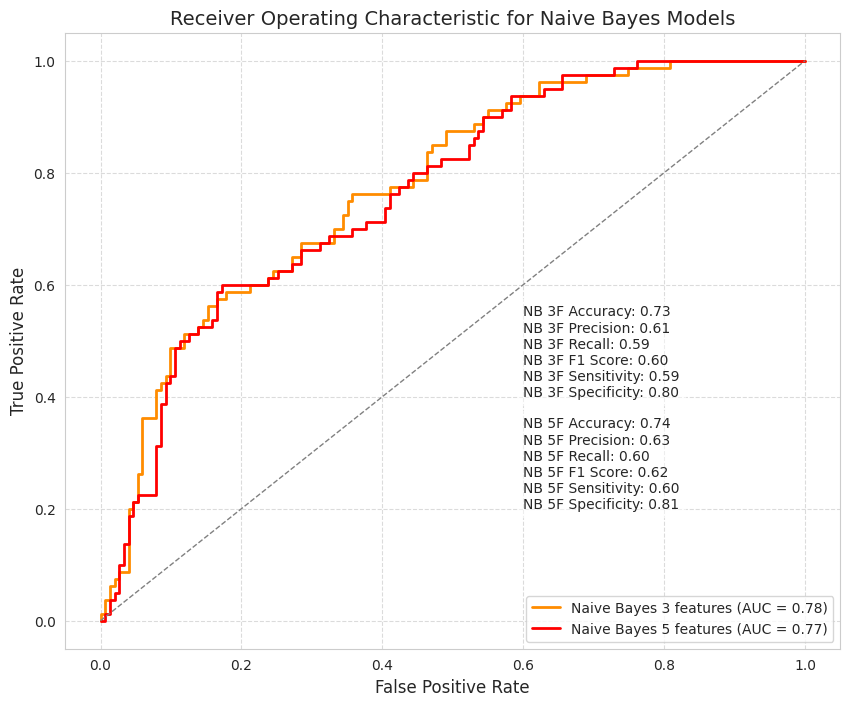

In [ ]:
# Plotting ROC Curve for Naive Bayes models
fpr_nb_3f, tpr_nb_3f, _ = roc_curve(y_test, y_pred_prob_nb_3f)
roc_auc_nb_3f = auc(fpr_nb_3f, tpr_nb_3f)

fpr_nb_5f, tpr_nb_5f, _ = roc_curve(y_test, y_pred_prob_nb_5f)
roc_auc_nb_5f = auc(fpr_nb_5f, tpr_nb_5f)

plt.figure(figsize=(10, 8))
plt.plot(fpr_nb_3f, tpr_nb_3f, color='darkorange', lw=2, label='Naive Bayes 3 features (AUC = %0.2f)' % roc_auc_nb_3f)
plt.plot(fpr_nb_5f, tpr_nb_5f, color='red', lw=2, label='Naive Bayes 5 features (AUC = %0.2f)' % roc_auc_nb_5f)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic for Naive Bayes Models', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Annotate performance metrics for Naive Bayes models
plt.text(0.6, 0.4, f'NB 3F Accuracy: {nb_accuracy_3f:.2f}\nNB 3F Precision: {nb_precision_3f:.2f}\nNB 3F Recall: {nb_recall_3f:.2f}\nNB 3F F1 Score: {nb_f1_3f:.2f}\nNB 3F Sensitivity: {nb_sensitivity_3f:.2f}\nNB 3F Specificity: {nb_specificity_3f:.2f}', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.6, 0.2, f'NB 5F Accuracy: {nb_accuracy_5f:.2f}\nNB 5F Precision: {nb_precision_5f:.2f}\nNB 5F Recall: {nb_recall_5f:.2f}\nNB 5F F1 Score: {nb_f1_5f:.2f}\nNB 5F Sensitivity: {nb_sensitivity_5f:.2f}\nNB 5F Specificity: {nb_specificity_5f:.2f}', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

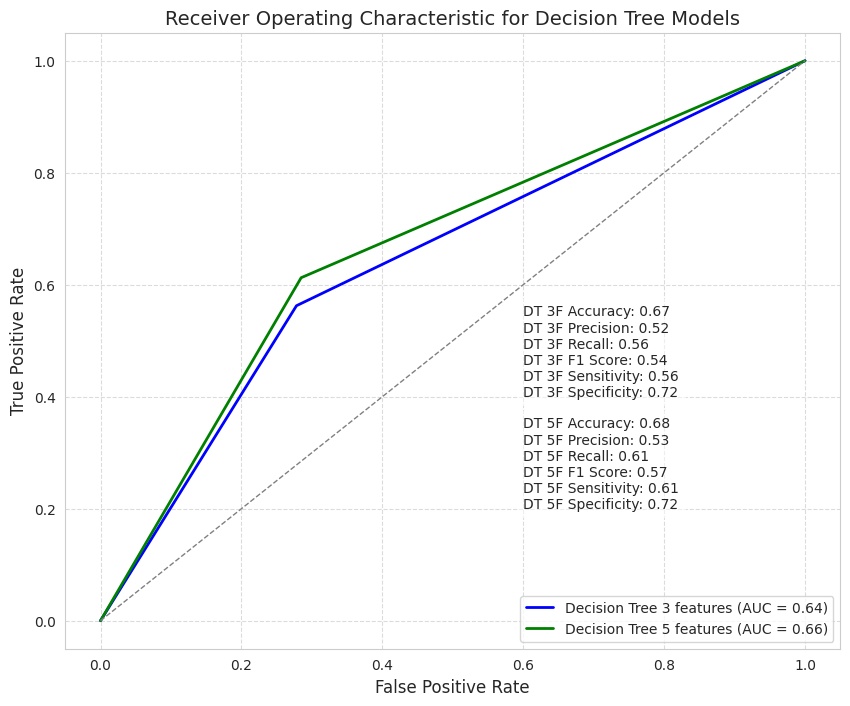

In [ ]:
# Plotting ROC Curve for Decision Tree models
fpr_dt_3f, tpr_dt_3f, _ = roc_curve(y_test, y_pred_prob_dt_3f)
roc_auc_dt_3f = auc(fpr_dt_3f, tpr_dt_3f)

fpr_dt_5f, tpr_dt_5f, _ = roc_curve(y_test, y_pred_prob_dt_5f)
roc_auc_dt_5f = auc(fpr_dt_5f, tpr_dt_5f)

plt.figure(figsize=(10, 8))
plt.plot(fpr_dt_3f, tpr_dt_3f, color='blue', lw=2, label='Decision Tree 3 features (AUC = %0.2f)' % roc_auc_dt_3f)
plt.plot(fpr_dt_5f, tpr_dt_5f, color='green', lw=2, label='Decision Tree 5 features (AUC = %0.2f)' % roc_auc_dt_5f)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic for Decision Tree Models', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Annotate performance metrics for Decision Tree models
plt.text(0.6, 0.4, f'DT 3F Accuracy: {dt_accuracy_3f:.2f}\nDT 3F Precision: {dt_precision_3f:.2f}\nDT 3F Recall: {dt_recall_3f:.2f}\nDT 3F F1 Score: {dt_f1_3f:.2f}\nDT 3F Sensitivity: {dt_sensitivity_3f:.2f}\nDT 3F Specificity: {dt_specificity_3f:.2f}', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.6, 0.2, f'DT 5F Accuracy: {dt_accuracy_5f:.2f}\nDT 5F Precision: {dt_precision_5f:.2f}\nDT 5F Recall: {dt_recall_5f:.2f}\nDT 5F F1 Score: {dt_f1_5f:.2f}\nDT 5F Sensitivity: {dt_sensitivity_5f:.2f}\nDT 5F Specificity: {dt_specificity_5f:.2f}', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.show()


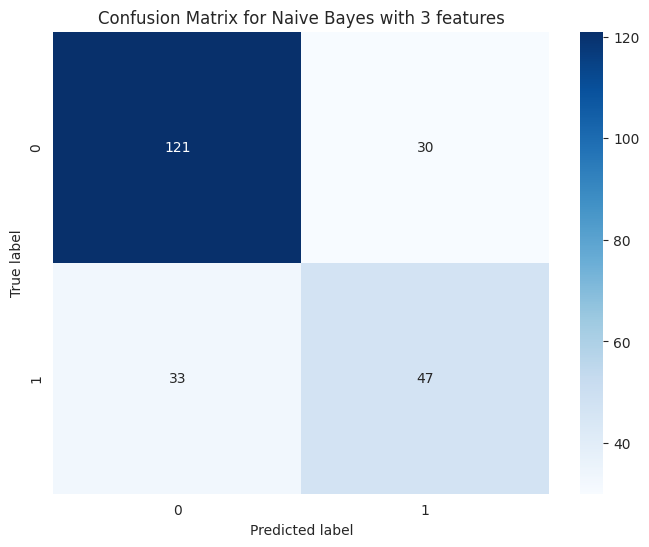

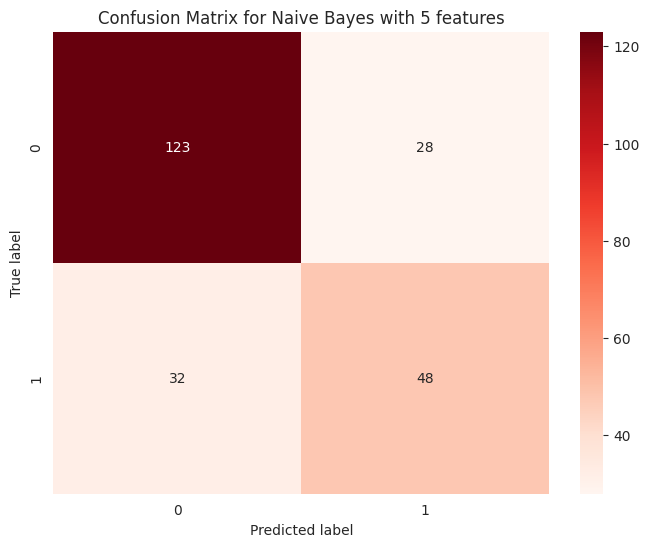

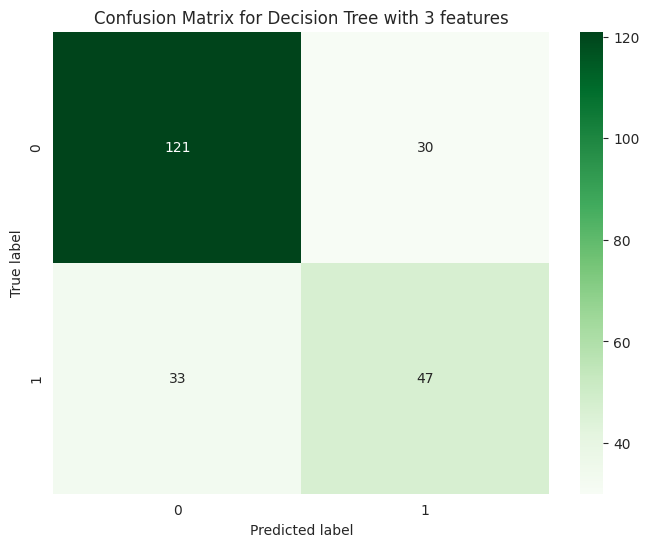

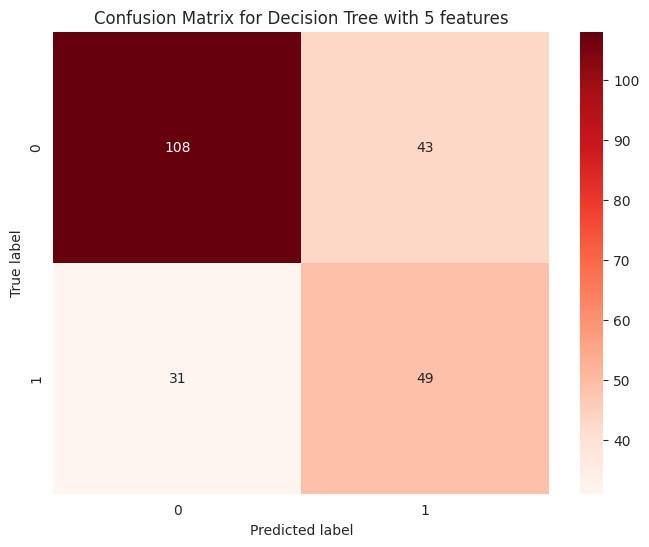

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb_3f, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Naive Bayes with 3 features')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb_5f , annot=True, fmt="d", cmap="Reds")
plt.title('Confusion Matrix for Naive Bayes with 5 features')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb_3f, annot=True, fmt="d", cmap="Greens")
plt.title('Confusion Matrix for Decision Tree with 3 features')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_5f , annot=True, fmt="d", cmap="Reds")
plt.title('Confusion Matrix for Decision Tree with 5 features')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
import joblib

# Save Naive Bayes models
joblib.dump(nb_model_3f, 'naive_bayes_3f_model.joblib')
joblib.dump(nb_model_5f, 'naive_bayes_5f_model.joblib')

# Save Decision Tree models
joblib.dump(dt_model_3f, 'decision_tree_3f_model.joblib')
joblib.dump(dt_model_5f, 'decision_tree_5f_model.joblib')


['decision_tree_5f_model.joblib']

In [ ]:
# Load the saved models
loaded_nb_model_3f = joblib.load('naive_bayes_3f_model.joblib')
loaded_nb_model_5f = joblib.load('naive_bayes_5f_model.joblib')
loaded_dt_model_3f = joblib.load('decision_tree_3f_model.joblib')
loaded_dt_model_5f = joblib.load('decision_tree_5f_model.joblib')
